# Restoring Faded Colored Photographs

## Contrast Stretching

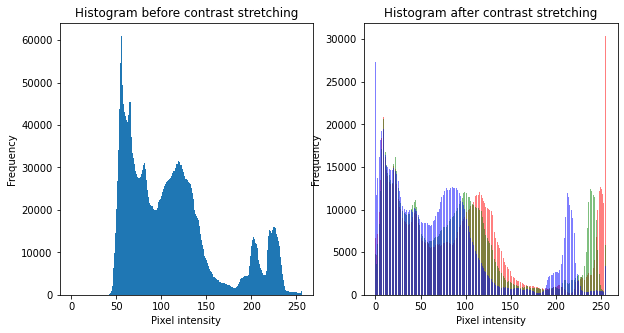

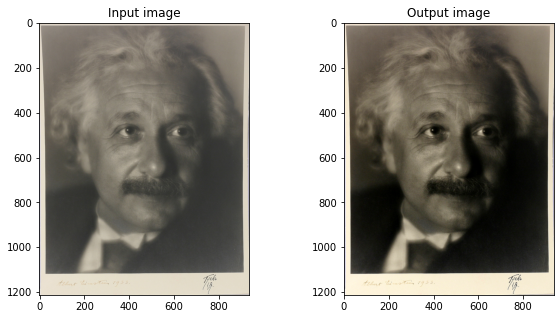

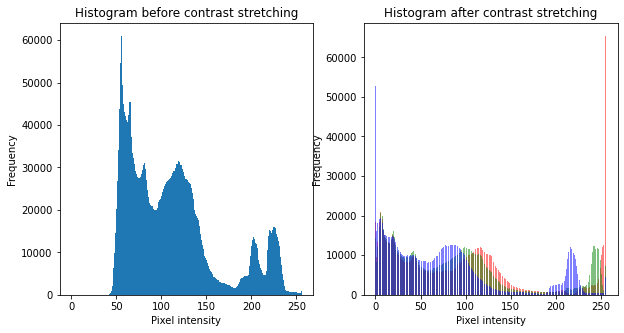

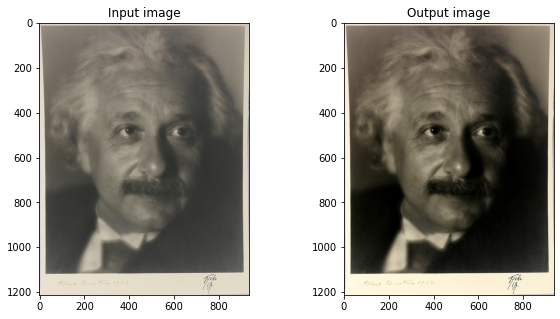

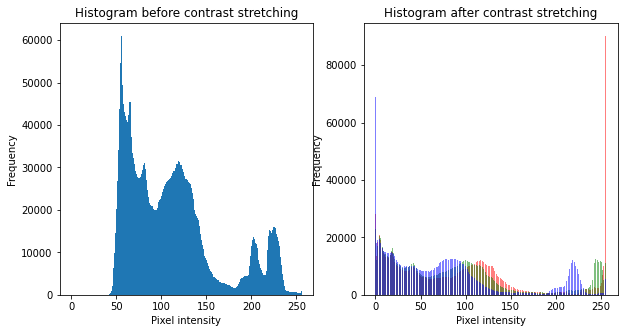

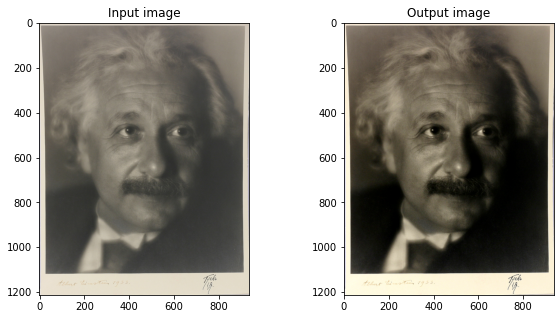

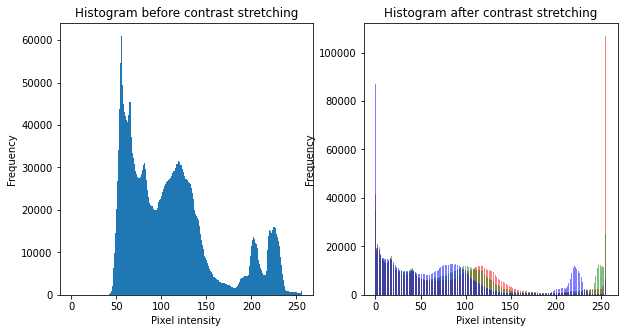

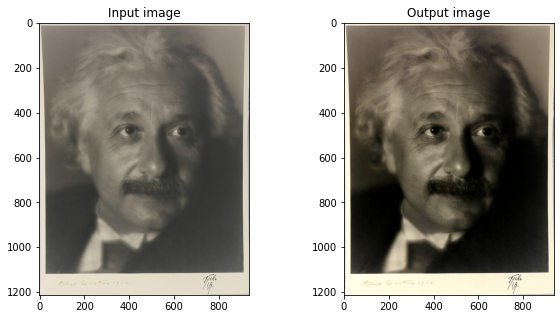

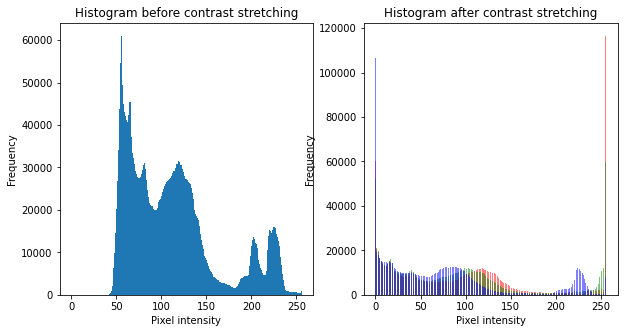

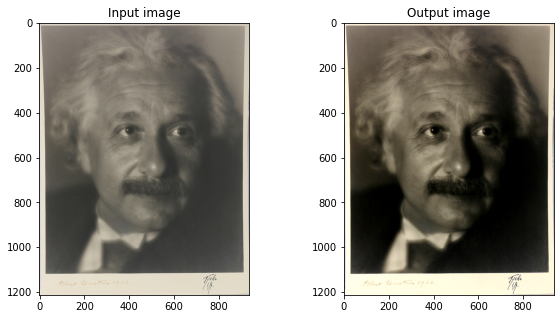

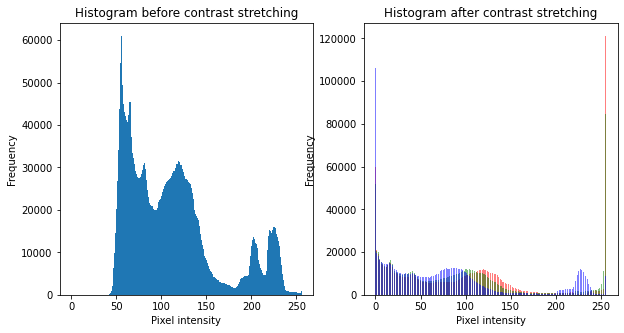

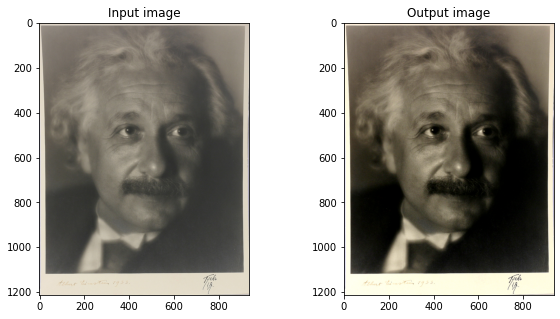

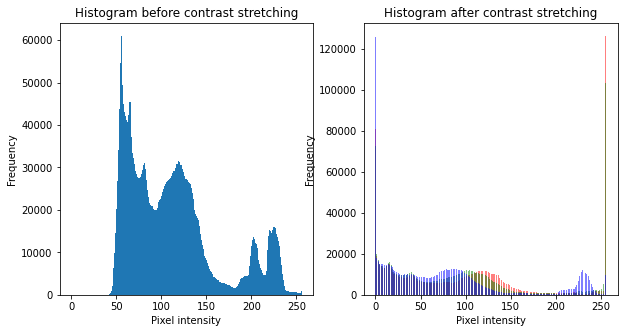

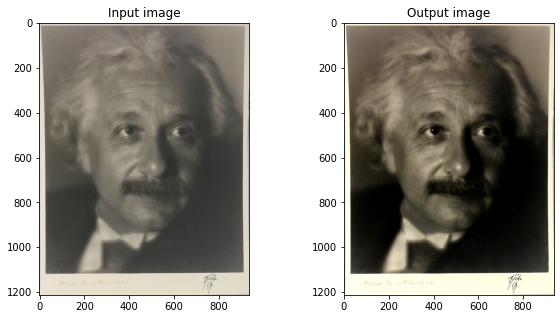

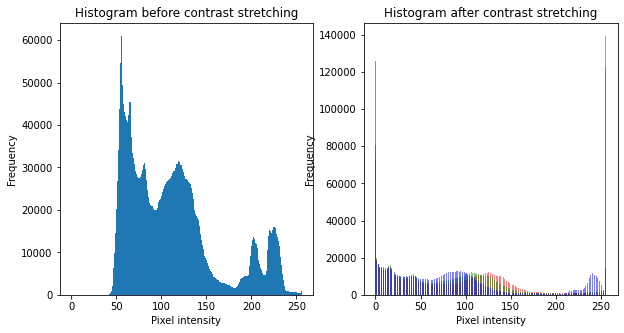

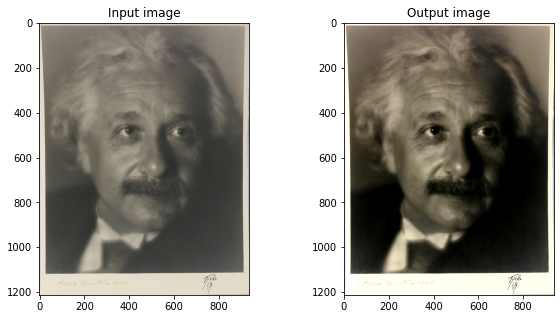

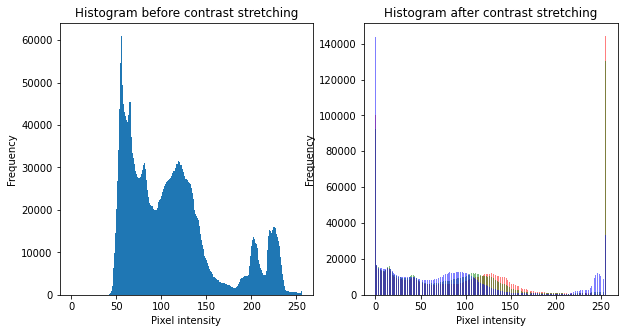

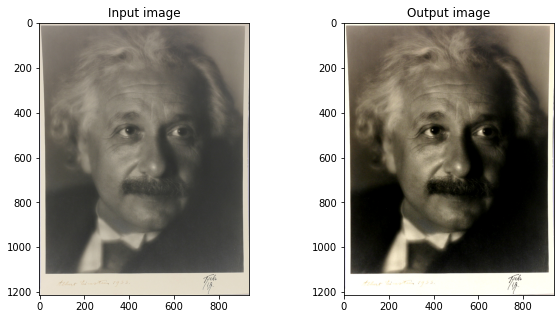

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def contrast_rgb(path, lower, upper): 
    """
    User defined function to apply contrast stretching to an image
    To increase contrast effects, apply percentile rescaling by clipping pixel values
    For RGB contrasting, we avoid grayscaling the input image
    Histogram is plotted for each color channel
    This can also be used to recover faded image
    
    Parameters:
    
    path (string): set the path of the input image
    lower (int): set the lower percentile clipping lower pixel values
    upper (int): set the higher percentile clipping higher pixel values
    
    Author:
    Lyle Kenneth Geraldez
    """
    
    # Load image
    image = Image.open(path)

    # Calculate minimum and maximum pixel values
    min_val, max_val = np.min(image), np.max(image)

    # Define lower and upper percentile values
    lower_percentile = lower
    upper_percentile = upper

    # Calculate new minimum and maximum pixel values
    new_min_val = np.percentile(image, lower_percentile)
    new_max_val = np.percentile(image, upper_percentile)

    # Apply contrast stretching
    output_image = (image - new_min_val) * (255 / (new_max_val - new_min_val))
    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    # Plot histogram before and after contrast stretching
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].hist(np.array(image).ravel(), bins=256, range=(0, 256))
    axs[0].set_title('Histogram before contrast stretching')
    axs[0].set_xlabel('Pixel intensity')
    axs[0].set_ylabel('Frequency')
    for i in range(3):
        axs[1].hist(output_image[:,:,i].ravel(), 
        bins=256, range=(0, 256), alpha=0.5, color=['red', 'green', 'blue'][i])
    # axs[1].hist(output_image.ravel(), bins=256, range=(0, 256))
    axs[1].set_title('Histogram after contrast stretching')
    axs[1].set_xlabel('Pixel intensity')
    axs[1].set_ylabel('Frequency')
    # plt.savefig(f'contrast_rgb_hist_{lower}.png', facecolor='black')

    # Display input and output images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Input image')
    axs[1].imshow(output_image, cmap='gray')
    axs[1].set_title('Output image')
    # plt.savefig(f'contrast_rgb_{lower}.png', facecolor='black')
    plt.show()

for i in range(1, 10, 1):
    contrast_rgb('faded_einstein.jpg', i,100-i)

## Gray World

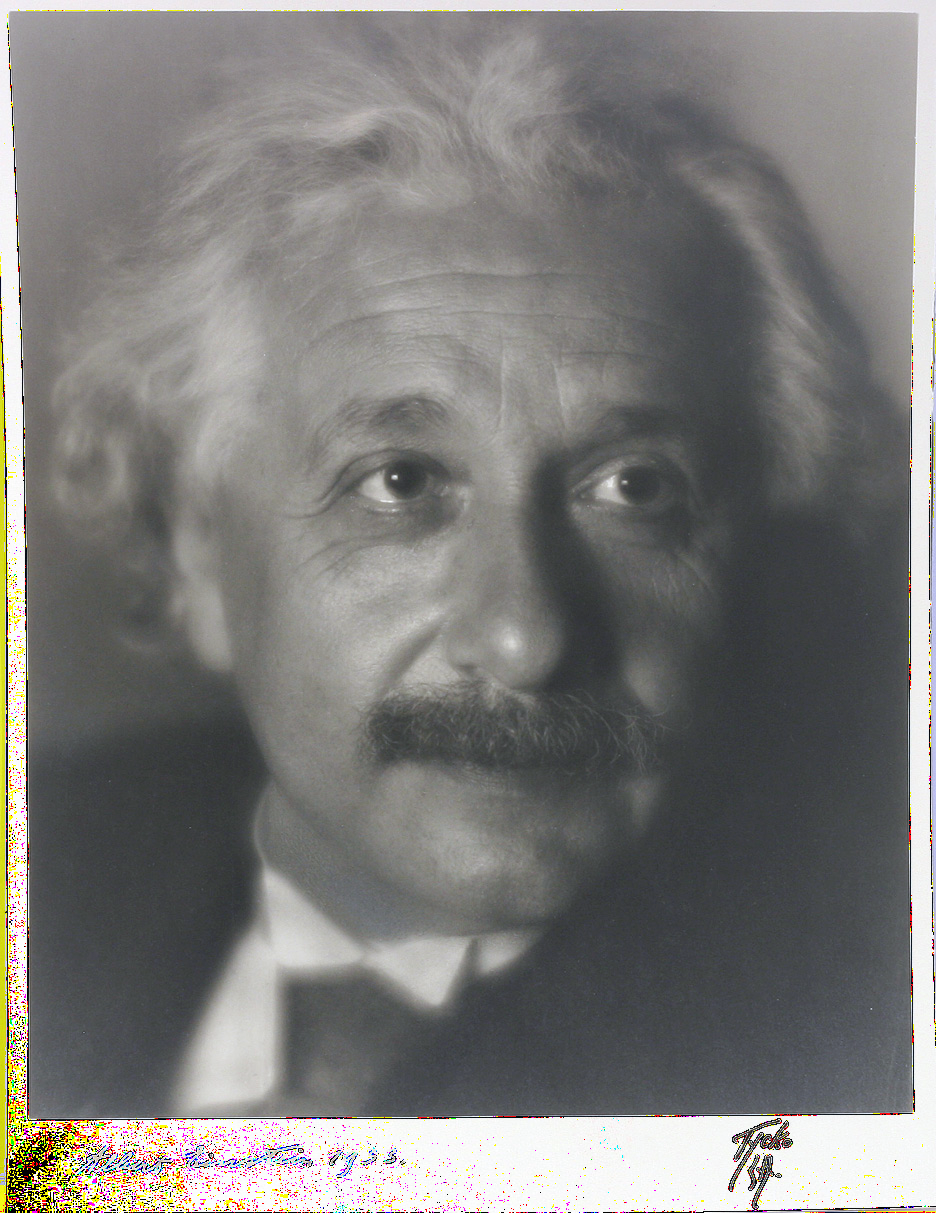

In [4]:
import numpy as np
from PIL import Image

def gray_world(img_path):
    """
    User defined function to apply the gray world algorithm for faded photograph recovery
    
    Parameters:
    img_path (string): set input image path
    
    Author:
    Lyle Kenneth Geraldez
    """
    
    # Load the image
    img = Image.open(img_path)
    # Convert the image to a numpy array
    img_arr = np.array(img)
    
    # Get the average value of the red, green and blue channel of the image
    Rave = np.mean(img_arr[:,:,0])
    Gave = np.mean(img_arr[:,:,1])
    Bave = np.mean(img_arr[:,:,2])
    
    # To get the white balanced image, divide each RGB channel by the respective averages
    img_arr[:,:,0] = img_arr[:,:,0] / Rave * 128
    img_arr[:,:,1] = img_arr[:,:,1] / Gave * 128
    img_arr[:,:,2] = img_arr[:,:,2] / Bave * 128
    
    # Convert the numpy array back to an image
    balanced_img = Image.fromarray(np.uint8(img_arr))
    return balanced_img

gray_world('faded_einstein.jpg')

## White Patch

In [5]:
import cv2

# Define the mouse event handler function
def mouse_event_handler(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # if left mouse button is clicked
        print(f'Coordinates: ({x}, {y})')

# Load the image using OpenCV
img = cv2.imread('faded_einstein.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Set the mouse event handler function to the window
cv2.setMouseCallback('image', mouse_event_handler)

# Display the image in the window
cv2.imshow('image', img)
cv2.waitKey(0)  # Wait for a key to be pressed to close the window
cv2.destroyAllWindows()  # Close all windows

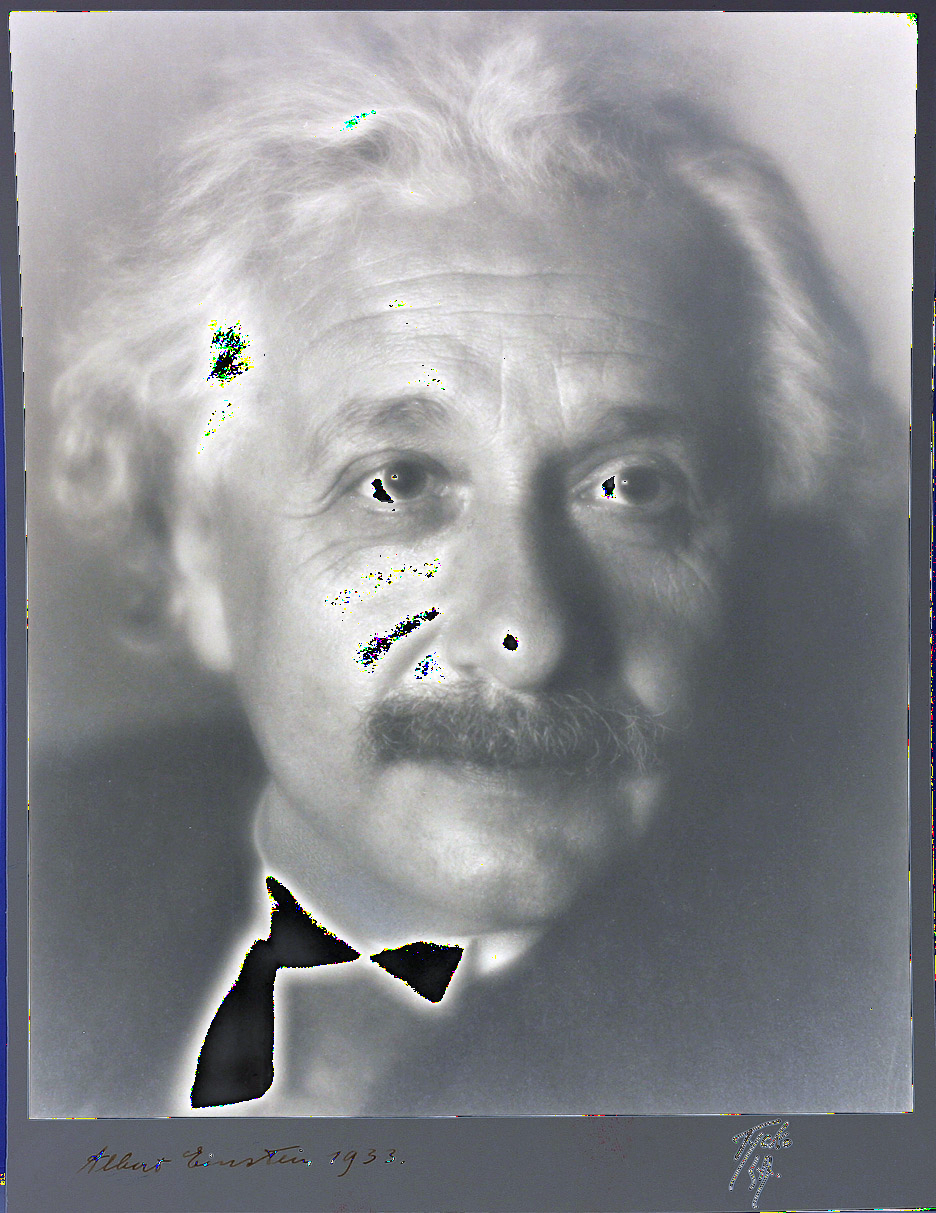

In [10]:
import numpy as np
from PIL import Image

def white_patch(img_path, white_patch_region):
    """
    User defined function to apply the white patch algorithm for faded photograph recovery
    
    Parameters:
    img_path (string): set input image path
    white_patch_region (tuple): set four numbers in the following format 
        (top, bottom, left, right) coordinates of the white patch region
    
    
    Author:
    Lyle Kenneth Geraldez
    """
    
    # Load the image
    img = Image.open(img_path)
    
    # Convert the image to a numpy array
    img_arr = np.array(img)
    
    # Get a region from the image which is known to be white
    white_patch_arr = img_arr[white_patch_region[0]:white_patch_region[1], 
                              white_patch_region[2]:white_patch_region[3]]
    
    # Average the RGB of the white pixels to get Rw, Gw, Bw, separately
    Rw = np.mean(white_patch_arr[:,:,0])
    Gw = np.mean(white_patch_arr[:,:,1])
    Bw = np.mean(white_patch_arr[:,:,2])
    
    # Divide each channel of the whole original image with the respective white averages
    img_arr[:,:,0] = img_arr[:,:,0] / Rw * 255
    img_arr[:,:,1] = img_arr[:,:,1] / Gw * 255
    img_arr[:,:,2] = img_arr[:,:,2] / Bw * 255
    
    # Convert the numpy array back to an image
    balanced_img = Image.fromarray(np.uint8(img_arr))
    return balanced_img

white_patch('faded_einstein.jpg', (480,495,367,383))